# ** CPSC 8810 Deep Learning - HW1-3 **
---

## Introduction
_**Note:** This assignment makes use of the MNIST dataset_

The main objective of this assignments:
* Fit network with random labels
* Compare number of parameters vs generalization
* Compare flatness vs generalization

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.decomposition import PCA

tf.__version__
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## MNIST Dataset Preparation and Visualization

In [2]:
data = input_data.read_data_sets('data/MNIST/', one_hot=True);

train_num = data.train.num_examples
valid_num = data.validation.num_examples
test_num = data.test.num_examples
img_flatten = 784
img_size = 28
num_classes = 10
print("Training Dataset Size:",train_num)
print("Validation Dataset Size:",valid_num)
print("Testing Dataset Size:",test_num)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Training Dataset Size: 55000
Validation Dataset Size: 5000
Testing Dataset Size: 10000


## Model Architecture

In [3]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

Instructions for updating:
Use the `axis` argument instead


In [4]:
m1_conv1 = tf.layers.conv2d(inputs=input_x,filters=16,kernel_size=5,padding="same",activation=tf.nn.relu,name='layer_conv1');
m1_pool1 = tf.layers.max_pooling2d(inputs=m1_conv1,pool_size=2,strides=2);
m1_conv2 = tf.layers.conv2d(inputs=m1_pool1,filters=36,kernel_size=5,padding="same",activation=tf.nn.relu,name='layer_conv2');
m1_pool2 = tf.layers.max_pooling2d(inputs=m1_conv2,pool_size=2,strides=2);
m1_flat1 = tf.layers.flatten(m1_pool2);
m1_fc1 = tf.layers.dense(inputs=m1_flat1,units=128,activation=tf.nn.relu, name='layer_fc1');
m1_logits = tf.layers.dense(inputs=m1_fc1,units=num_classes,activation=None, name='layer_fc_out');

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.Dense instead.


In [5]:
# Cross Entropy Loss
m1_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=m1_logits);
m1_loss = tf.reduce_mean(m1_cross_entropy);

# Accuracy
m1_softmax = tf.nn.softmax(logits=m1_logits);
m1_pred_op = tf.argmax(m1_softmax,dimension=1);
m1_acc_op = tf.reduce_mean(tf.cast(tf.equal(m1_pred_op, y_cls), tf.float32));

# Optimizer and Training Operation
m1_optimizer = tf.train.AdamOptimizer(learning_rate=0.0001);
m1_train_op = m1_optimizer.minimize(m1_loss);

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



## Training Model on MNIST Dataset

In [6]:
x_train = data.train.images
y_train = data.train.labels
np.random.shuffle(y_train)
y_train.shape

(55000, 10)

In [7]:
def createBatches(train_x,train_y,batch_size):
    mini_batches = []
    data_num = train_x.shape[0]
    idx = np.arange(data_num)
    np.random.shuffle(idx)
    train_x = train_x[idx]
    train_y = train_y[idx]
    for i in range(0,data_num-batch_size,batch_size):
        x = train_x[i:i+batch_size]
        y = train_y[i:i+batch_size]
        mini_batches.append((x,y))
    if data_num % batch_size != 0:
        x = train_x[i+batch_size:data_num]
        y = train_y[i+batch_size:data_num]
        mini_batches.append((x,y))
    return mini_batches

In [8]:
session = tf.Session() 
session.run(tf.global_variables_initializer())         # initialize var in graph
EPOCH = 250
BATCH_SIZE = 64
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []
for i in range(EPOCH):
    batches = createBatches(x_train,y_train,BATCH_SIZE)
    for batch in batches:
        x_batch, y_true_batch = batch
        session.run(m1_train_op, feed_dict={x: x_batch,y: y_true_batch})
    train_loss, train_acc = session.run([m1_loss,m1_acc_op], feed_dict={x: x_batch,y: y_true_batch})
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_loss, test_acc = session.run([m1_loss,m1_acc_op],feed_dict={x:data.test.images,y:data.test.labels})
    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)
    if i%5 == 0:
        print("Epoch: ",i,"Train Loss: ",train_loss,"Test Loss: ",test_loss,"Test acc: ",test_acc)


Epoch:  0 Train Loss:  2.2860048 Test Loss:  2.303318 Test acc:  0.114
Epoch:  5 Train Loss:  2.284216 Test Loss:  2.309342 Test acc:  0.1077
Epoch:  10 Train Loss:  2.2937663 Test Loss:  2.3085473 Test acc:  0.122
Epoch:  15 Train Loss:  2.2837274 Test Loss:  2.3626912 Test acc:  0.1125
Epoch:  20 Train Loss:  2.1205523 Test Loss:  2.348106 Test acc:  0.1168
Epoch:  25 Train Loss:  2.0614145 Test Loss:  2.3893402 Test acc:  0.1118
Epoch:  30 Train Loss:  2.0731323 Test Loss:  2.4228163 Test acc:  0.1321
Epoch:  35 Train Loss:  2.0676734 Test Loss:  2.4912903 Test acc:  0.0954
Epoch:  40 Train Loss:  1.996632 Test Loss:  2.5313988 Test acc:  0.1065
Epoch:  45 Train Loss:  1.7455286 Test Loss:  2.614907 Test acc:  0.095
Epoch:  50 Train Loss:  1.6507668 Test Loss:  2.67114 Test acc:  0.0932
Epoch:  55 Train Loss:  1.7097915 Test Loss:  2.6961453 Test acc:  0.1021
Epoch:  60 Train Loss:  1.6752834 Test Loss:  2.7504852 Test acc:  0.105
Epoch:  65 Train Loss:  1.881123 Test Loss:  2.84071

Text(0, 0.5, 'Accuracy')

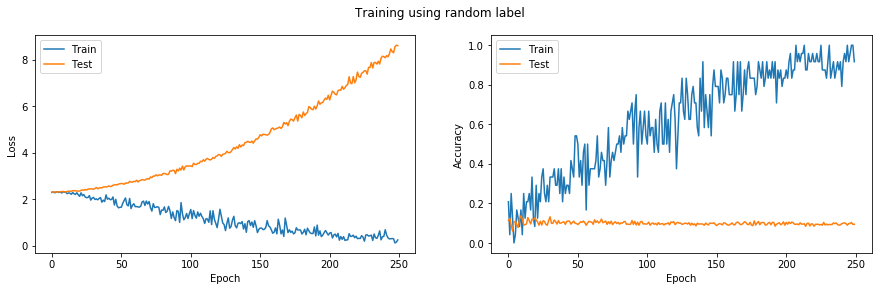

In [18]:
fig,axs = plt.subplots(1,2)
fig.set_figwidth(15)
fig.suptitle('Training using random label')
axs[0].plot(np.arange(0,EPOCH),train_loss_list)
axs[0].plot(np.arange(0,EPOCH),test_loss_list)
axs[0].legend(['Train','Test'])
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[1].plot(np.arange(0,EPOCH),train_acc_list)
axs[1].plot(np.arange(0,EPOCH),test_acc_list)
axs[1].legend(['Train','Test'])
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')